# **Tarea 3 : Análisis avanzado de datos con *Python***
---

Esta es un tarea para practicar las habilidades adquiridas usando *Python* en análisis avanzado de datos con estadística inferencial y modelado estadístico. Utilizaremos el [dataset de flores Iris](https://archive.ics.uci.edu/ml/datasets/iris) del repositorio de la *Universidad de California, Irvine*.

El conjunto de datos cuenta con información de medidas en flores *Iris* de tres especies distintas:

| Variable | Definición	| Valores | 
| --- | --- | --- |
| sepal_length | 	Longitud del sépalo en centímetros. | 	Numérico |
| sepal_width 	|  Ancho del sépalo en centímetros. | 	Numérico
| petal_length 	| Longitud del pétalo en centímetros. 	| Numérico|
| petal_width |	Ancho del pétalo en centímetros. 	| Numérico|
| label |	Etiqueta con la especie de la flor medida.	| 'setosa', 'virginica' y 'versicolor' |


In [1]:
# Importar librerías
import numpy as np
import pandas as pd
from scipy import stats
import scipy
import statsmodels.api as sm

#Seaborn se discutirá en la unidad 4; se incluye aquí con fines demostrativos.
import seaborn as sns

## **0.  Leer el archivo de datos**
---

In [7]:
### EJECUTAR ESTA CELDA SIN MODIFICARLA. SI FALLA, DEBE SEGUIR EL PROCEDIMIENTO DESCRITO ANTES.
iris_original = pd.read_csv('data/iris.csv')

In [8]:
iris_original.info()

## **1. Conjunto de datos *iris***
---

El conjunto de datos *iris* es un popular conjunto de datos en el área del aprendizaje de máquina. Contiene información de $50$ muestras de medidas en las características de flores de género *iris* de $3$ especies distintas. Para ello se realizó la medición de la longitud y ancho de los pétalos y sépalos de cada espécimen. En esta tarea, vamos a explorar las características de cada especie, intentando identificar detalles que las diferencien.

In [10]:
#TEST_CELL

# El método pairplot genera gráficos de dispersión por cada variable del conjunto. 
# En la diagonal se presenta la distribución. Además, el tono del color (hue) 
# es distinto de acuerdo a la especie de flor ('label')

sns.pairplot(iris_original, hue = 'label');

Como podemos observar, las tres especies de flores *Iris* tienen una distribución similar de sus ejemplares. Sin embargo, se puede distinguir fácilmente que la especie **setosa** difiere en varias de las combinaciones de variables, como las medidas en sus pétalos, con respecto a las otras dos especies: **versicolor** y **virginica**. ¿Qué tanta es la diferencia de las flores de la especie **setosa** con respecto a las demás?

Al consultar algunas de las estadísticas descriptivas de cada especie podemos ver 

In [ ]:
#TEST_CELL
(iris_original.groupby('label')
  .agg([np.mean, np.std]) #Estadísticas descriptivas de media y deviación estándar.
  .T #Se transpone para mostrar mejor.
)

Las medidas medias en sus pétalos parecen indicar una diferencia clara en esta variable de las 3 especies de flores, y en especial de la especie **setosa**. Sin embargo, **¿podemos afirmar que estas diferencias entre especies son significativas?**

Para los siguientes puntos se requiere realizar unas modificaciones al *dataset* original. En este ejercicio deberá generar el *DataFrame* **`iris_df`**, que tendrá los siguientes cambios:

  1.  Los nombres de las columnas deberán ser reemplazados de esta manera:

| iris_original | iris_df	| 
| :---: | :---: |
|'sepal length (cm)' | 'longitud_sépalo'|
|'sepal width (cm)'  | 'ancho_sépalo'|
|'petal length (cm)' | 'longitud_pétalo'|
|'petal width (cm)'  | 'ancho_pétalo'|
|'label' | 'especie'|


  2. El nuevo *DataFrame* (**`iris_df`**) deberá tener registros únicamente de las especies **versicolor** y **virginica**. Como la especie **setosa** es particularmente distinguible del resto, nos enfocaremos únicamente en las otras dos especies en los próximos puntos de la tarea.

  3. Crear una característica adicional dentro de los dataframe con la variable numérica **`es_versicolor`** que indique si la flor es de esa especie, representada con el número **`1`** para las flores de la especie especificada, y  **`0`** para las flores **virginica**. 

  4. Crear una característica adicional dentro del DataFrame con la variable numérica **`es_virginica`** que indique si la flor es de esa especie, representado con el número **`1`** para las flores de esa especie, y  **`0`** para las flores **versicolor**. 



El resultado final de la ejecución debería generar un objeto como el mostrado a continuación al ejecutar la siguiente instrucción: 

```
>>> iris_df.head()
```


|    |   longitud_sépalo |   ancho_sépalo |   longitud_pétalo |   ancho_pétalo | especie    |   es_versicolor |   es_virginica |
|:---:|:------------------:|:---------------:|:------------------:|:---------------:|:-----------|:----------------:|:---------------:|
| 50 |               7   |            3.2 |               4.7 |            1.4 | versicolor |               1 |              0 |
| 51 |               6.4 |            3.2 |               4.5 |            1.5 | versicolor |               1 |              0 |
| 52 |               6.9 |            3.1 |               4.9 |            1.5 | versicolor |               1 |              0 |
| 53 |               5.5 |            2.3 |               4   |            1.3 | versicolor |               1 |              0 |
| 54 |               6.5 |            2.8 |               4.6 |            1.5 | versicolor |               1 |              0 |




<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>
<p>

* Puede reemplazar los nombres de índices o columnas con el método **`rename`** del objeto *DataFrame*. Para facilitar la transcripción utilice el siguiente diccionario:
```python
{
    'sepal length (cm)': 'longitud_sépalo',
    'sepal width (cm)' : 'ancho_sépalo',
    'petal length (cm)': 'longitud_pétalo',
    'petal width (cm)' : 'ancho_pétalo',
    'label' : 'especie'
}
```
* Puede usar el operador **`!=`** para realizar una selección condicional con elementos que **NO** sean iguales al operando.
* Existen varias alternativas para crear las nuevas columnas. Algunas de ellas son:
  * Método **`apply`**.
  * Método **`replace`**.
  * Método **`astype`** transformando una serie de booleanos en enteros **`int`**.

  Cualquiera de estas soluciones es válida.
</p>

In [ ]:
# VARIABLE CALIFICADA iris_df:

### ESCRIBA SU CÓDIGO AQUÍ ### (~ 10 líneas de código)
iris_df = iris_original.copy() # Creamos la copia del dataset original


iris_df['es_versicolor'] = None
iris_df['es_virginica'] = None




### FIN DEL CÓDIGO ###

iris_df.head()

In [ ]:
#TEST_CELL

# Comprobamos que las nuevas columnas tengan los nombres esperados.
set(iris_df.columns)

**Salida esperada:**

```python
{'ancho_pétalo',
 'ancho_sépalo',
 'es_versicolor',
 'es_virginica',
 'especie',
 'longitud_pétalo',
 'longitud_sépalo'}
```

In [ ]:
#TEST_CELL

# Comprobamos que las nuevas columnas tengan la cantidad de datos esperados.
iris_df.shape

**Salida esperada:**

```python
(100, 7)
```

In [ ]:
#TEST_CELL

# Comprobamos que las nuevas columnas tengan la cantidad de datos esperados.
iris_df[['es_versicolor', 'es_virginica']].sum()

**Salida esperada:**

```python
es_versicolor    50
es_virginica     50
dtype: int64
```

## **2. ¿Existe una relación lineal entre las medidas?**
---

Una aproximación para la caracterización de las flores de cada especie es intentar encontrar una correlación entre las medidas de las variables por cada flor. ¿Existe una relación entre el ancho de un pétalo y su longitud?. En caso de que así sea, ¿es posible modelar esta relación?. Si se caracteriza esta relación por medio de una regresión lineal, la función podría ayudar a predecir medidas en flores cuya especie sea conocida. 

Su tarea es implementar la función **`iris_corr_regr`**, con la cual, dada una variable independiente y una variable dependiente, debe determinar el modelo lineal entre estas variables (pendiente e intercepto). Además, deberá identificar el coeficiente de correlación y el p-valor de la correlación.

**Entradas:**

  * **`var_ind`**: Nombre de la variable numérica independiente o de predicción sobre la que se realiza el cálculo (**`longitud_sépalo`, `ancho_sépalo`, `longitud_pétalo` o `ancho_pétalo`**).
  * **`var_dep`**: Nombre de la variable numérica dependiente o de respuesta sobre la que se realiza el cálculo (**`longitud_sépalo`, `ancho_sépalo`, `longitud_pétalo` o `ancho_pétalo`**).
  * **`especie`**: Especie de la flor en la que se realiza el cálculo (**`virginica` o `versicolor`**).



**Salidas:**
  
  * **`crecimiento`:** Factor de crecimiento esperado en la medida de la variable dependiente con respecto a la variable independiente. Es la razón esperada entre la variable dependiente y la variable independiente.
  * **`valor_inicial`:** Valor de la variable dependiente cuando la variable independiente es 0.
  * **`correlación`:** Coeficiente de correlación (*Pearson*) de ambas variables en las flores de la especie.
  * **`p-valor`:** p-valor de la correlación.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

* Puede realizar selección condicional en un eje y selección por etiquetas en otro con el atributo **`.loc`**. Haga esto para obtener los conjuntos **`x`** y **`y`** necesarios para calcular la regresión.
* Utilice el método **`scipy.stats.linregress`**. Para saber más, consulte el material de la guía de modelado estadístico o la documentación oficial de la función.
* Interprete el significado de crecimiento y valor inicial en el contexto de una regresión lineal.

In [ ]:
# FUNCIÓN CALIFICADA iris_corr_regr:

def iris_corr_regr(var_ind, var_dep, especie):
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 3 líneas de código)


  # Si prefiere, podría ser necesario borrar la siguiente línea y definir las variables una a la vez.
  crecimiento, valor_inicial, correlación, p_valor = None, None, None, None 

  
  ### FIN DEL CÓDIGO ###
  return crecimiento, valor_inicial, correlación, p_valor

In [ ]:
#TEST_CELL

iris_corr_regr('longitud_sépalo', 'ancho_sépalo', 'virginica')

**Salida esperada:**

```python
(0.23189049503351364,
 1.4463054187192128,
 0.4572278163941129,
 0.0008434624723708779)
```

Puede utilizar la siguiente celda de prueba para gráficar los resultados. Si lo desea, puede cambiar las variables utilizadas para explorar el resultado obtenido en cada caso. 

Los parámetros usados para producir la salida esperada de la celda siguiente son:

* **`var_ind`**: `'longitud_pétalo'`
* **`var_dep`**: `'longitud_sépalo'`
* **`especie`**: `'virginica'`

In [ ]:
#TEST_CELL

# Defina los valores de entrada y ejecute la visualización (OPCIONAL)
var_ind = 'longitud_pétalo'
var_dep = 'longitud_sépalo'
especie = 'virginica'

# NOTA: Su solución debe ser correcta.
m, b, r, p = iris_corr_regr(var_ind, var_dep, especie) 
mod_lin =  m * iris_df[var_ind] + b

# Gráfica de dispersión
ax = iris_df.plot.scatter(var_ind, var_dep, figsize = (6,5)) 
ax.get_figure().set_dpi(105);
ax.plot(iris_df[var_ind], mod_lin, c='r', label='Regresión lineal'); 
ax.legend();

**Salida esperada:**

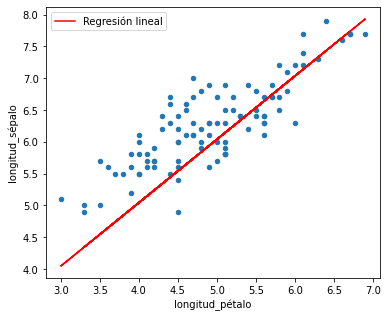

## **3. ¿Se puede distinguir entre las flores *virginica* y *versicolor*?**
---

Las estadísticas descriptivas medidas y la visualización exploratoria en las flores de la especie ***setosa*** sugieren una diferencia notable con respecto a las especies ***versicolor*** y ***virginica***. Esta diferencia parece muy significativa a simple vista. Por otro lado, entre las especies ***versicolor*** y ***virginica*** parece haber mayor similitud en la mayoría de sus variables.

Su tarea es implementar la función **`iris_hipotesis_especies`**, que realiza una prueba de hipótesis en una variable dada y determina, con un nivel de confianza deseado, si se puede afirmar que las flores de las especies difieren significativamente. La prueba debe comparar las especies ***versicolor*** y ***virginica***.

**Entrada:**
  * **`variable`**: Nombre de la variable numérica sobre la que se realiza el test (**`longitud_sépalo`, `ancho_sépalo`, `longitud_pétalo` o `ancho_pétalo`**).
  * **`confianza`**: Nivel $\beta$ de confianza.


**Salida:**  
  * **`resultado`**: Cadena de caracteres **`'virginica'`** si las flores de esta especie tienen mayor valor medio, **`'versicolor'`** si tienen mayor valor medio, y **`'ninguna'`** si no se encontró diferencia significativa, es decir, **si no se rechaza $H_0$**.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>


* Puede realizar selección condicional en un eje y selección por etiquetas en otro con el atributo **.loc**.
* Sólo si el resultado de la prueba arroja un resultado significativo deberá identificar cuál de las dos especies de flores tienen un valor medio mayor.
* Considere el tamaño de las muestras y demás factores. ¿Qué prueba de hipótesis discutida y ejemplificada en el material guía es la más apropiada?
* Utilice el p-valor obtenido y las medias de las dos muestras para determinar la respuesta. 


In [ ]:
# FUNCIÓN CALIFICADA iris_hipótesis_especies:

def iris_hipotesis_especies(variable, confianza):
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 6 líneas de código)
    
  resultado =  None

  ### FIN DEL CÓDIGO ###
  return resultado

In [ ]:
#TEST_CELL
iris_hipotesis_especies('ancho_sépalo', 0.95)

**Salida esperada:**

```python
'virginica'
```

In [ ]:
#TEST_CELL

### CELDA DE PRUEBAS (NO MODIFICAR) ###  
iris_hipotesis_especies('ancho_sépalo', 0.999)

**Salida esperada:**

```python
'ninguna'
```

## **4. ¿Podemos distinguir las dos especies de flores usando una regresión logística?**
---

Una de las tareas principales que se realiza durante el proceso de modelado de datos es implementar algoritmos que clasifiquen observaciones en algunas categorías dadas, por ejemplo, la especie de una flor. Una alternativa, usando métodos tradicionales de modelado estadístico, es calcular una **regresión logística** cuya función genera como salida valores numéricos en dos puntos discretos predominantes. Aunque otro tipo de clasificadores podría funcionar mejor para esta tarea, vamos a implementar un clasificador basado en una regresión logística con fines demostrativos.

Su tarea es implementar la función **`iris_calcular_logit`**, que toma como parámetros el nombre de una variable independiente y el nombre de la especie de flor. La variable dependiente es la variable numérica de la columna **`es_versicolor`** o **`es_virginica`**, dependiendo de la especie definida, ambas calculadas en el **Ejercicio 1**. Tenga en cuenta que si ese punto no es correcto, este tampoco lo será.

La fórmula de la regresión logística en una variable es la siguiente:

  $$y = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$$

**Entrada:**
  * **`especie`**: Cadena de texto con el nombre de la especie sobre la que se realiza el análisis. La variable objetivo de la regresión será **`es_versicolor`** para la especie **`versicolor`** y **`es_virginica`** para la especie **`virginica`**.
  * **`variable`**: Cadena de texto con el nombre de la variable numérica independiente o de predicción sobre la que se realiza el cálculo (**`longitud_sépalo`, `ancho_sépalo`, `longitud_pétalo` o `ancho_pétalo`**).

**Salida:**
  * **`y`**: valores del eje **y** calculados a partir del modelo de regresión logística. Este arreglo se consigue como resultado de aplicar numéricamente la fórmula de regresión logística sobre la **`variable`** con los parámetros obtenidos. Debe tener el mismo tamaño que **`variable`**.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

* En este ejercicio, deberá usar **`statsmodels`** y el método **`sm.GLM.from_formula`** como se discutió en la guía de modelado estadístico. Para esto deberá construir con cadenas de texto la fórmula en el formato apropiado.
* El aproximamiento recomendado es obtener los coeficientes de la regresión al aplicar la formula de predicción y entonces utilizarlos con operaciones matemáticas sobre la variable independiente.
*  Los parámetros se pueden obtener con el atributo **`params`** en la variable de resultado (nombrada **`result`** en la guía) de la construcción del modelo. Este objeto contiene en una tupla los coeficientes $\beta_0$ y $\beta_1$.
*  Recuerde que puede aplicar directamente una función sobre un arreglo de *NumPy* que da como resultado otro arreglo del mismo tamaño.

In [ ]:
# FUNCIÓN CALIFICADA iris_calcular_logit:

def iris_calcular_logit(especie, variable):
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 4 líneas de código)

  
  y = pd.Series(np.NaN)

  ### FIN DEL CÓDIGO ###
  return y.values # Asumiendo que 'y' sea una Serie de pandas. Si 'y' es un arreglo de NumPy, debería retornar simplemente 'y'.

Para probar su función, utilice las siguientes celdas, que producen una visualización de la regresión.

Los parámetros usados para producir la salida esperada de la salida siguiente son:

* **`especie`**: `'versicolor'`
* **`variable`**: `'longitud_pétalo'`

In [ ]:
#TEST_CELL

### CELDA DE PRUEBAS (NO MODIFICAR) ### 

# Puede hacer diferentes pruebas modificando la selección de 'especie' y 'variable' a continuación:
especie = 'versicolor'
variable = 'longitud_pétalo'

y = iris_calcular_logit(especie, variable) # Su función debe producir una solución correcta.

np.round(y[:8], 4)

**Salida esperada:**
```python
array([0.8133, 0.9635, 0.4185, 0.9996, 0.9146, 0.9635, 0.8133, 1.    ])
```

In [ ]:
#TEST_CELL

### Función para generar una visualización de la regresión (NO MODIFICAR)##
def graficar_regresion(y, especie, variable):
  ax = iris_df.plot.scatter(variable, f'es_{especie}', label = f"Especie real: {especie}", figsize = (6,4.5)); # Gráfica de dispersión con la variable objetivo.
  ax.get_figure().set_dpi(105)  
  ax.scatter(iris_df[variable], y, color = 'red', lw = 1, label = "Regresión logística"); # Gráfica de líneas con los puntos calculados con la regresión.
  ax.legend()

In [ ]:
#TEST_CELL

# Graficar los resultados de la regresión logística (OPCIONAL)
graficar_regresion(y, especie, variable)

**Salida esperada:**

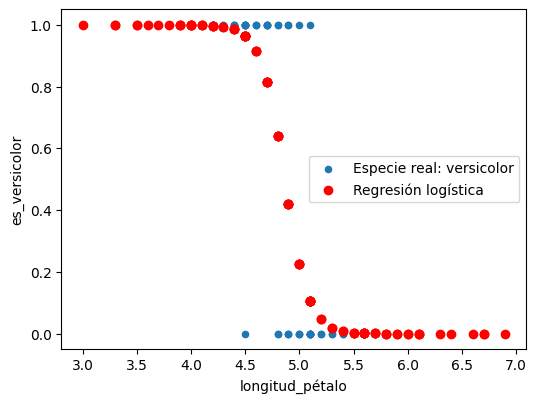

## **5. ¿El modelo genera una buena predicción?**
--- 

Los resultados de la visualización del punto anterior nos indican que, en algunos casos, el modelo es bastante acertado para clasificar flores de alguna de las dos especies. Vamos a evaluar la **exactitud (*accuracy*)** del modelo de regresión logística. Esta es una métrica de desempeño típica que se utiliza para evaluar los clasificadores. Se calcula de la siguiente manera:

$$Accuracy = \frac{número\ de\ aciertos}{total}$$

Su tarea es implementar la función **`iris_evaluar_logit`**, que valida la exactitud de la regresión en la predicción aproximando los valores. Para esto deberá:

  1. Crear una nueva columna **`modelo logit`** con el resultado de llamar a la función **`iris_calcular_logit`** con la especie y la variable correspondiente. 

  2. Crear una nueva columna **`predicción`**, redondeando al entero más cercano el número almacenado en la comuna **`modelo logit`**. Esta predicción se consigue encontrando la clase más cercana al número obtenido. Por ejemplo, para **`0.27`** la clase es **`0`** y para **`0.52`** la clase es **`1`**. 

  3. Compare los datos originales, según corresponda a partir de la columna **`es_virginica`** o **`es_versicolor`**, con los datos de la **`predicción`** en la nueva columna **`acierto`**. Esta columna contendrá los valores booleanos (**`True`** o **`False`**) que determinan si la predicción se realizó de la manera correcta o no.

Finalmente, retorne el *DataFrame* modificado con las nuevas columnas  **`modelo logit`**, **`predicción`** y **`acierto`**. 


**Entrada:**
  * **`especie`**: Cadena de texto con el nombre de la especie sobre la que se realiza el análisis. La variable objetivo de la regresión será **`es_versicolor`** para la especie **`versicolor`** y **`es_virginica`** para la especie **`virginica`**.
  * **`variable`**: Cadena de texto con el nombre de la variable numérica independiente o de predicción sobre la que se realiza el cálculo (**`longitud_sépalo`, `ancho_sépalo`, `longitud_pétalo` o `ancho_pétalo`**).
  
**Salida:**
  * **`iris_df_mod`**: Copia del *DataFrame* con las nuevas columnas especificadas.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>
<p>

* Para este ejercicio, deberá llamar a la función **`iris_calcular_logit`**. Si esa función retorna valores incorrectos, el resultado de este punto también fallará.
*  Tenga muy en cuenta cuál es la variable objetivo, determinada por la especie, y cuál la variable independiente. 
*  Puede usar métodos matemáticos de *NumPy* como **`np.rint`** para identificar directamente el entero más cercano de los valores de un arreglo.

In [ ]:
# FUNCIÓN CALIFICADA iris_evaluar_logit:

def iris_evaluar_logit(especie, variable):
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 3 líneas de código)
  
  
  
  ### FIN DEL CÓDIGO ###
  return iris_df 

In [ ]:
#TEST_CELL
iris_evaluar_logit('versicolor', 'longitud_pétalo')[
      ['es_virginica', 'es_versicolor', 'predicción', 'acierto']
    ].head(10)

**Salida esperada:**

---

|    |   es_virginica |   es_versicolor |   predicción | acierto   |
|:--:|:----------:|:-----------:|:------------:|:-----------:|
| 50 |          0 |    1  |         1.0 | True        |
| 51 |          0 |    1  |         1.0 | True        |
| 52 |          0 |    1 |          0.0 | False        |
| 53 |          0 |    1 |          1.0 | True        |
| 54 |          0 |    1 |          1.0 | True        |
| 55 |          0 |    1 |          1.0 | True        |
| 56 |          0 |    1 |          1.0 | True        |
| 57 |          0 |    1 |          1.0 | True        |
| 58 |          0 |    1 |          1.0 | True        |
| 59 |          0 |    1 |          1.0 | True        |



In [ ]:
#TEST_CELL
iris_evaluar_logit('versicolor', 'longitud_pétalo')
accuracy = iris_df['acierto'].mean() # En la suma los valores booleanos True y False se interpretan como 1 y 0.
print(accuracy)

**Salida esperada:**

---
```python
0.93
```


Como se puede ver con los resultados de este último ejercicio, los resultados del modelo son bastante acertados. No obstante, para otras combinaciones entre **`variable`** y **`especie`** no será así. Puede hacer pruebas con otras combinaciones por su parte y evaluar los resultados.